# Octava Actividad: Proyecto Final: 

- **Data source**: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- **Introducción**: El avance en el análisis de datos ha permitido a las empresas optimizar sus procesos mediante el uso de modelos de Machine Learning. En este proyecto, se busca aplicar técnicas de Machine Learning para resolver un problema concreto dentro de una industria o negocio, aprovechando los datos para obtener predicciones precisas y eficaces. La audiencia principal de este análisis incluye gerentes de operaciones, analistas de datos y cualquier interesado en el uso de la inteligencia artificial aplicada a la toma de decisiones.
- **Objetivo principal**: Desarrollar y entrenar modelos de Machine Learning que permitan resolver un problema de clasificación o regresión, seleccionando el modelo con mejor desempeño mediante técnicas de optimización y evaluación.

# 0. Librerias

In [2]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# 1. Abstracto con motivación y audiencia:

El análisis de datos de estudiantes basado en sus calificaciones y características como el nivel educativo de los padres, el tipo de almuerzo y la participación en un curso de preparación para pruebas, tiene como objetivo entender mejor los factores que influyen en el éxito académico. Este estudio está motivado por la necesidad de identificar las variables que afectan el rendimiento escolar, con el fin de mejorar las intervenciones educativas.

La audiencia beneficiaria incluye:
- **Instituciones educativas**: para ajustar sus estrategias pedagógicas y apoyo a los estudiantes.
- **Docentes y orientadores**: para proporcionar una mejor orientación y recursos personalizados.
- **Padres de familia**: para entender el impacto de su nivel educativo y otros factores en el desempeño de sus hijos.
- **Policymakers**: para crear políticas educativas basadas en datos.

# 2. Preguntas/Problema
El problema principal que buscamos resolver es predecir el **éxito académico de los estudiantes** en función de diversas variables, tales como:
- Las calificaciones en matemáticas, lectura y escritura.
- El nivel educativo de los padres.
- El tipo de almuerzo que consumen.
- Si completaron el curso de preparación para la prueba.

Este problema se puede encuadrar como un problema de **clasificación**, donde el objetivo es predecir si un estudiante logrará un cierto nivel de éxito (por ejemplo, aprobar o no) basado en estas características. Alternativamente, también se puede modelar como un problema de **regresión**, donde buscamos predecir una calificación final o un puntaje acumulado, en lugar de una etiqueta binaria de aprobado/no aprobado. 

**Preguntas clave:**
1. ¿Qué factores tienen el mayor impacto en el éxito de los estudiantes?
2. ¿Es posible predecir si un estudiante aprobará o no con base en sus características socioeconómicas y académicas?
3. ¿Cómo afecta el nivel educativo de los padres al rendimiento escolar de los estudiantes?

# 3. Extracción de datos

In [3]:
ruta = r'C:\Users\USER\OneDrive\Escritorio\ActividadesBIT\Actividad_8'
df = pd.read_csv(ruta + '\\' + 'StudentsPerformance.csv', sep = ',', encoding='utf-8')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 4. Limpieza y transformación de los datos

In [5]:
#Reviso si hay datos nulos
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#Saco un promedio de las notas para saber quiénes pasaron
df['Score_Total'] = round(df[['math score', 'reading score', 'writing score']].sum(axis=1)/3, 2)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score_Total
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [7]:
#Creo otra columna definiendo si pasaron o no, se pasa a partir de 70
df['Passed'] = (df[['Score_Total']] > 70).all(axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score_Total,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True
1,female,group C,some college,standard,completed,69,90,88,82.33,True
2,female,group B,master's degree,standard,none,90,95,93,92.67,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,False
4,male,group C,some college,standard,none,76,78,75,76.33,True
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,True
996,male,group C,high school,free/reduced,none,62,55,55,57.33,False
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,False
998,female,group D,some college,standard,completed,68,78,77,74.33,True


In [8]:
#Procedo a normalizar los datos
scaler = MinMaxScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score_Total,Passed
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111,72.67,True
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667,82.33,True
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222,92.67,True
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778,49.33,False
4,male,group C,some college,standard,none,0.76,0.734940,0.722222,76.33,True
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.987952,0.944444,94.00,True
996,male,group C,high school,free/reduced,none,0.62,0.457831,0.500000,57.33,False
997,female,group C,high school,free/reduced,completed,0.59,0.650602,0.611111,65.00,False
998,female,group D,some college,standard,completed,0.68,0.734940,0.744444,74.33,True


In [9]:
#También vamos a estandarizar los datos
scaler = StandardScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Score_Total,Passed
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492,72.67,True
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269,82.33,True
2,female,group B,master's degree,standard,none,1.577711,1.770109,1.642475,92.67,True
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744,49.33,False
4,male,group C,some college,standard,none,0.653954,0.605158,0.457333,76.33,True
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.445746,2.044215,1.774157,94.00,True
996,male,group C,high school,free/reduced,none,-0.269803,-0.970952,-0.859491,57.33,False
997,female,group C,high school,free/reduced,completed,-0.467751,0.125472,-0.201079,65.00,False
998,female,group D,some college,standard,completed,0.126093,0.605158,0.589015,74.33,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
 8   Score_Total                  1000 non-null   float64
 9   Passed                       1000 non-null   bool   
dtypes: bool(1), float64(4), object(5)
memory usage: 71.4+ KB


# 5. Exploración de los datos

race/ethnicity  group A  group B  group C  group D  group E
gender                                                     
female               36      104      180      129       69
male                 53       86      139      133       71


<Figure size 1600x1000 with 0 Axes>

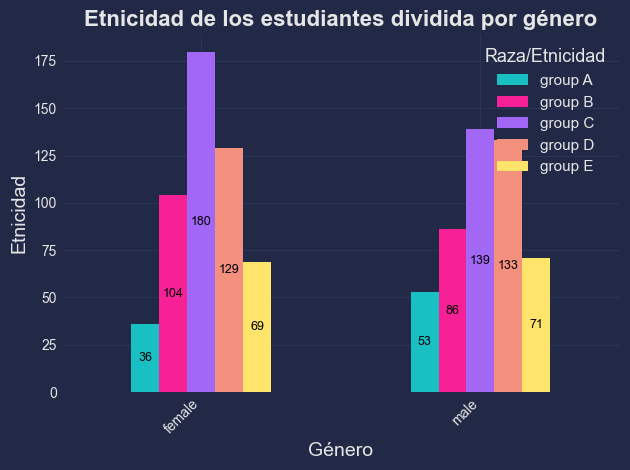

In [11]:
#Cantidad de estudiantes por etnicidad
personas_etnicidad = df.groupby(['gender', 'race/ethnicity']).size().unstack(fill_value=0)
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# Mostrar el conteo
print(personas_etnicidad)

# Graficar los resultados - bar
plt.figure(figsize=(16, 10))
personas_etnicidad.plot(kind='bar', stacked=False)
#Ajuste de títulos y etiquetas
plt.title('Etnicidad de los estudiantes dividida por género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=14)
plt.ylabel('Etnicidad', fontsize=14)
plt.legend(title='Raza/Etnicidad', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Se agregan etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
#Ajuste del diseño
plt.tight_layout()
#Mostrar gráfica
plt.show()

Hay gran variedad de etnicidad y razas dentro de la muestra de estudiantes, resulta ser un grupo variado y bastante bueno para los resultados que vamos optener, ya que vamos a evaluar a una amplia gama de estudiantes diferente, donde el grupo más grande es el **grupo C** y el grupo con menor cantidad de personas es el **grupo A**.

gender
female    518
male      482
Name: count, dtype: int64


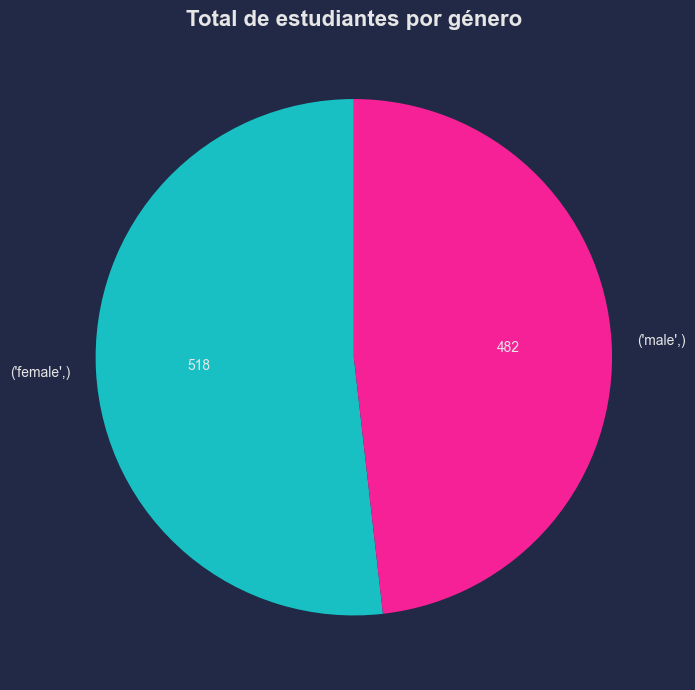

In [12]:
total_por_categoria = df[['gender']].value_counts()

#imprime este otro conteo
print(total_por_categoria)

#Graficar los resultados - pie
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(total_por_categoria, labels= total_por_categoria.index,  autopct=lambda p: '{:.0f}'.format(p * sum(total_por_categoria) / 100), startangle=90)
plt.title('Total de estudiantes por género', fontsize=16, fontweight='bold')
#Ajustar diseño
plt.tight_layout()
#Mostrar
plt.show()

Revisando el género de los estudiantes de nuestra muestra, vemos que hay mayor cantidad de mujeres que de hombres.

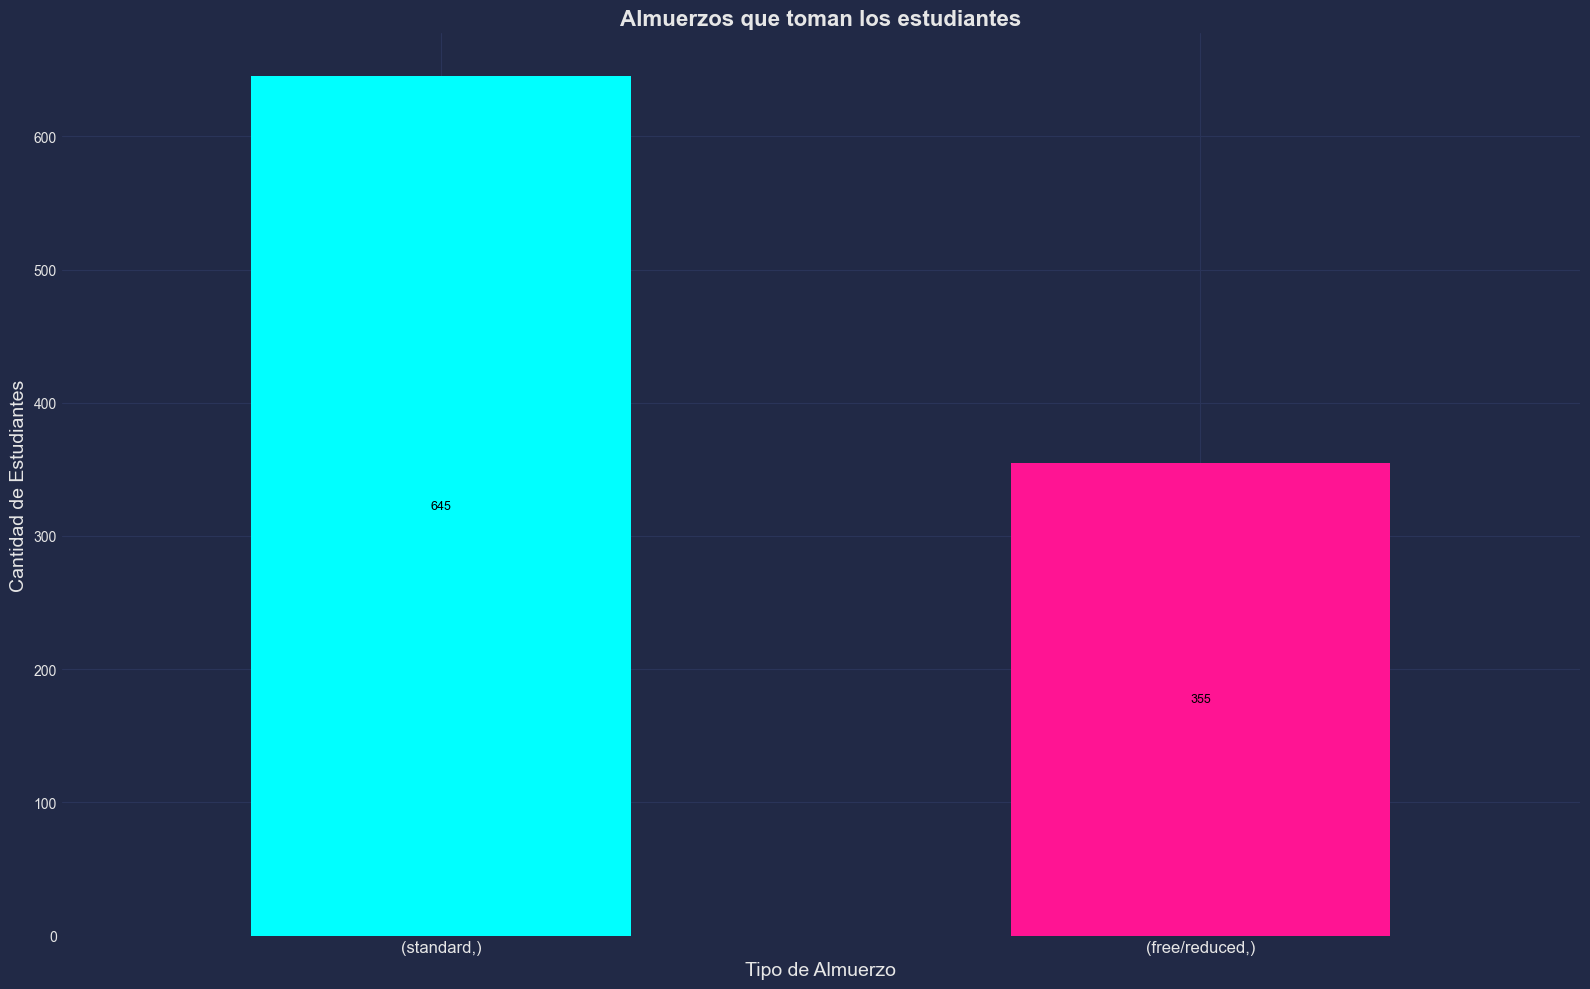

In [13]:
total_por_almuerzos = df[['lunch']].value_counts()
# Graficar los resultados - bar
plt.figure(figsize=(16, 10))
total_por_almuerzos.plot(kind='bar', color=['cyan', '#FF1493'])  # Ajusta los colores si deseas

# Ajuste de títulos y etiquetas
plt.title('Almuerzos que toman los estudiantes', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Almuerzo', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)

# Se agregan etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')

# Ajuste del diseño
plt.tight_layout()

# Mostrar gráfica
plt.show()

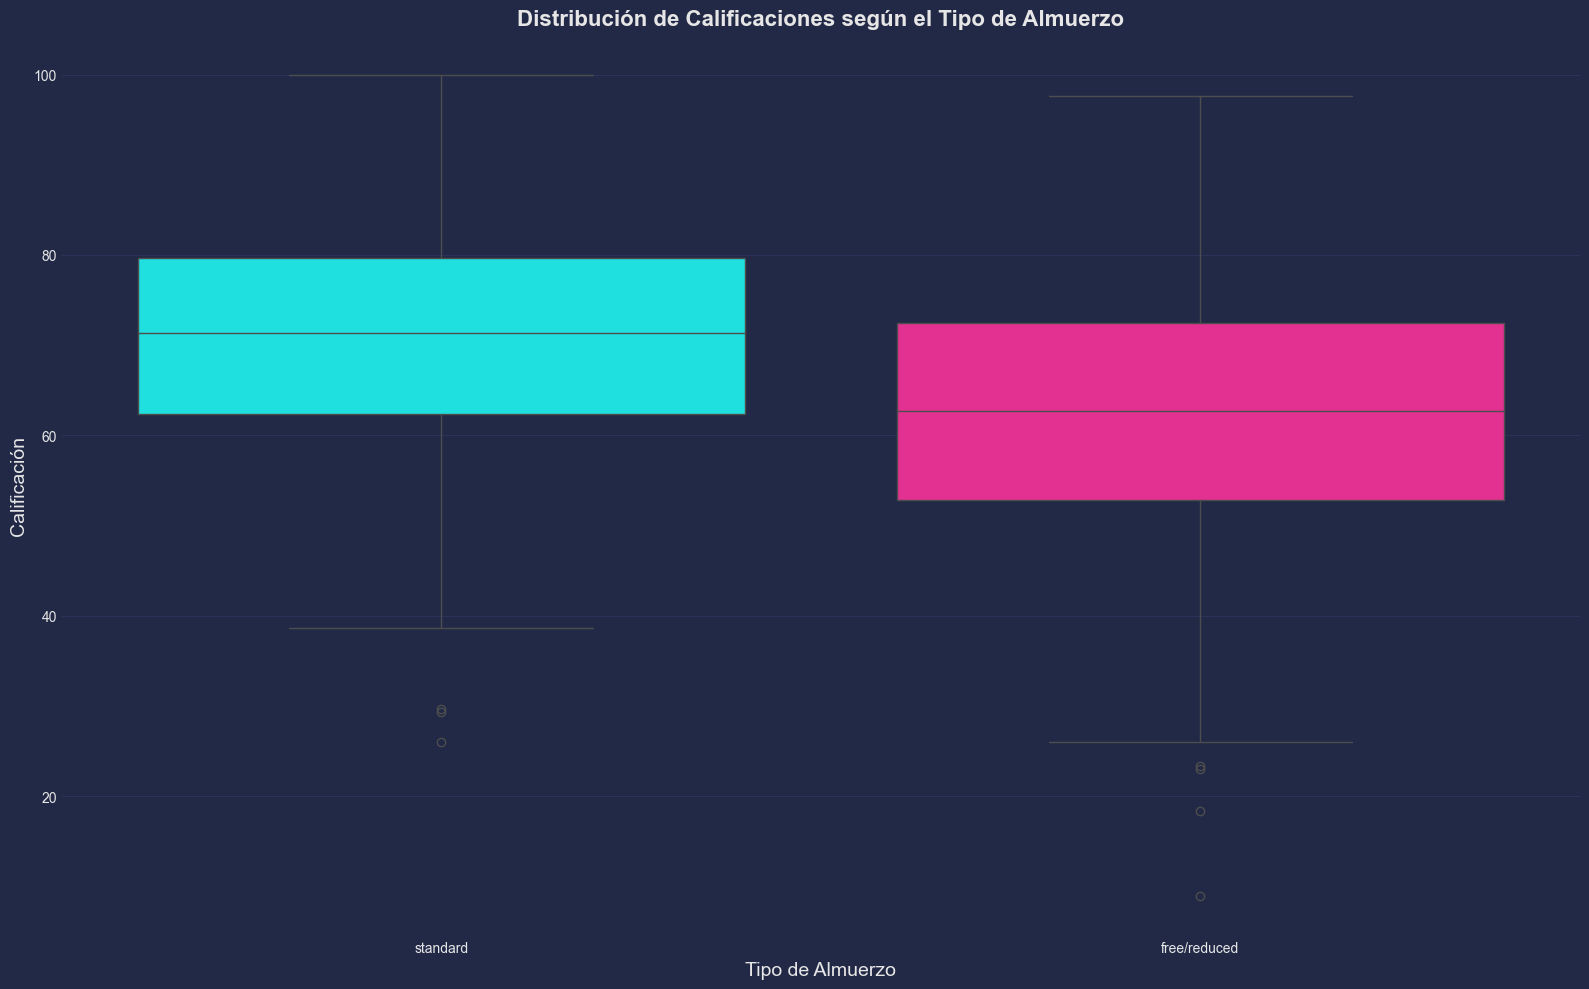

In [28]:
# Graficar boxplot comparando las calificaciones de matemáticas por tipo de almuerzo
plt.figure(figsize=(16, 10))
sns.boxplot(x='lunch', y='Score_Total', data=df, palette=['cyan', '#FF1493'])

# Ajuste de títulos y etiquetas
plt.title('Distribución de Calificaciones según el Tipo de Almuerzo', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Almuerzo', fontsize=14)
plt.ylabel('Calificación', fontsize=14)

# Ajuste del diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Las personas que tomaban un almuerzo standart parece que les fue mejor que a aquellos estudiantes que tenían un almuerzo reducido.

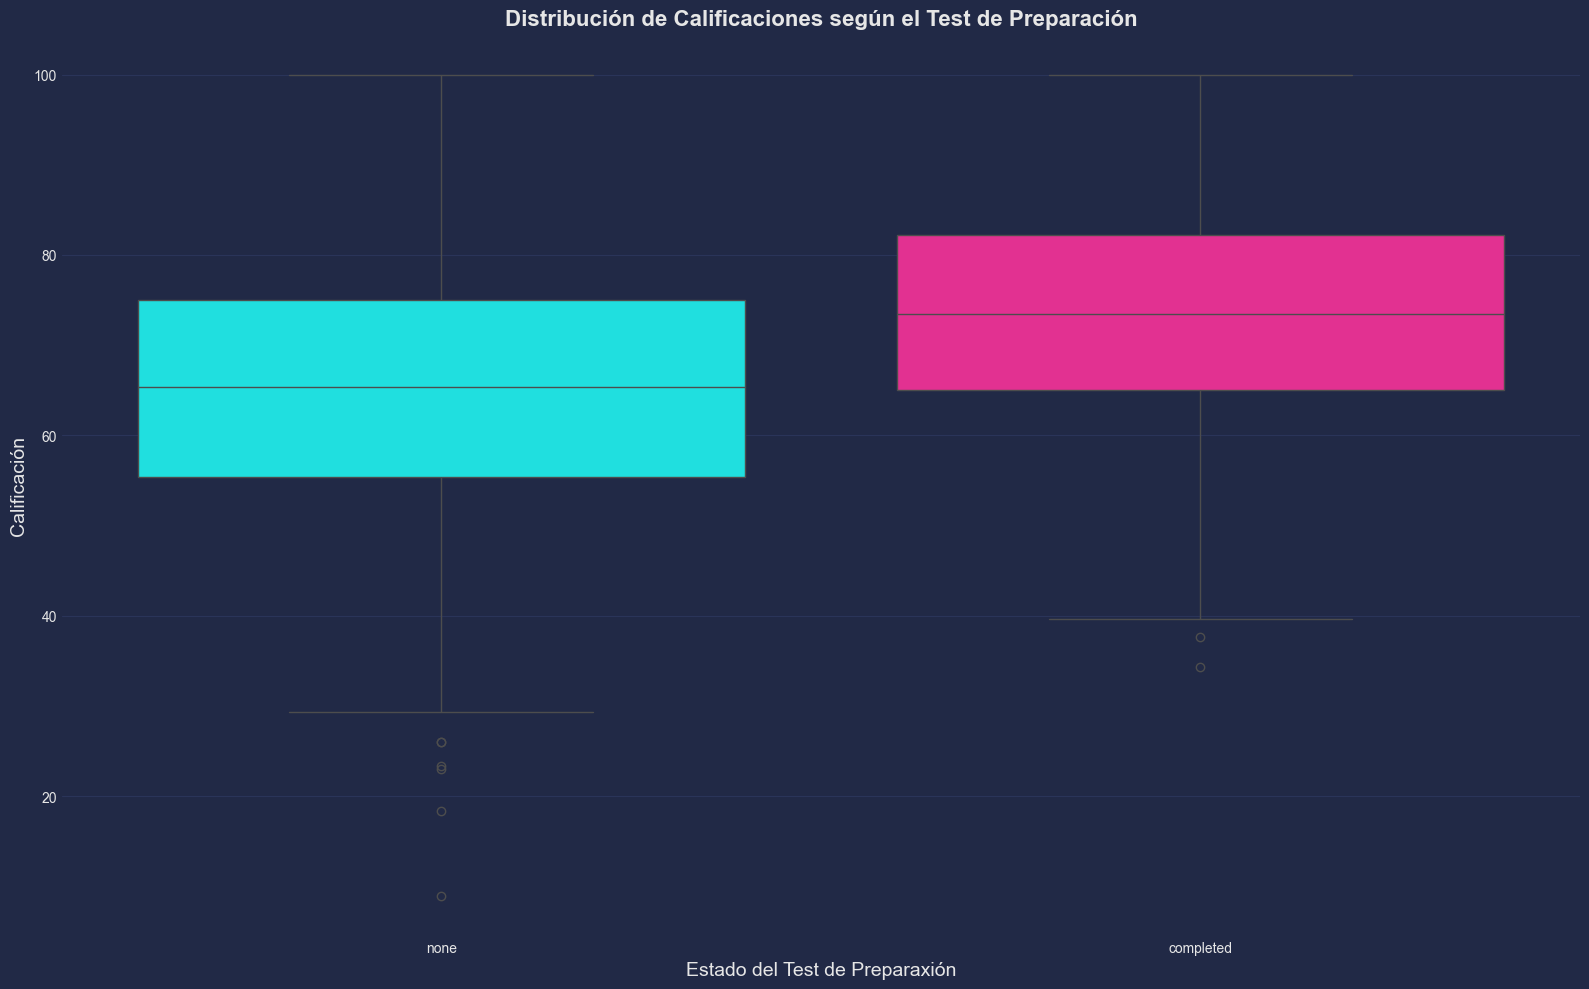

In [29]:
# Graficar boxplot comparando las calificaciones de matemáticas por tipo de almuerzo
plt.figure(figsize=(16, 10))
sns.boxplot(x='test preparation course', y='Score_Total', data=df, palette=['cyan', '#FF1493'])

# Ajuste de títulos y etiquetas
plt.title('Distribución de Calificaciones según el Test de Preparación', fontsize=16, fontweight='bold')
plt.xlabel('Estado del Test de Preparaxión', fontsize=14)
plt.ylabel('Calificación', fontsize=14)

# Ajuste del diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Tal como lo esperaba, parece que hay una relación entre los estudiantes que completaron el examen de preparación para las pruebas con el éxito de estos en las evaluaciones.

# 6. Desarrollo de modelos
A continuación voy a proceder el rendimiento de varios modelos de Machine Learning para poder comparar los resultados y elegir el modelo que mejor trabaje en este caso.

# 6.1. Random Forest

In [15]:
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]
y = df['Passed'].astype(str)

# Seleccionamos las columnas numéricas (A)
A = df[['math score', 'reading score', 'writing score']]

# Aplicamos get_dummies a las columnas categóricas en X (B)
B = pd.get_dummies(df[['gender', 'parental level of education', 'lunch', 'test preparation course']], drop_first=False)


In [16]:
X_final = pd.concat([A, B], axis=1)
X_final.head()

,math score,reading score,writing score,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.390024,0.193999,0.391492,True,False,False,True,False,False,False,False,False,True,False,True
1,0.192076,1.427476,1.313269,True,False,False,False,False,False,True,False,False,True,True,False
2,1.577711,1.770109,1.642475,True,False,False,False,False,True,False,False,False,True,False,True
3,-1.259543,-0.833899,-1.583744,False,True,True,False,False,False,False,False,True,False,False,True
4,0.653954,0.605158,0.457333,False,True,False,False,False,False,True,False,False,True,False,True


In [18]:
#Se separa la información para training y testing
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.30, random_state=42)

In [19]:
#Se crea el modelo de Machine Learning
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30, criterion='gini')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

In [20]:
#Por úñtomo podemos comparar predicciones con resultados reales
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       173
        True       0.95      0.98      0.96       127

    accuracy                           0.97       300
   macro avg       0.96      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [21]:
len(clf.feature_importances_)

15

In [22]:
len(x_train.columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

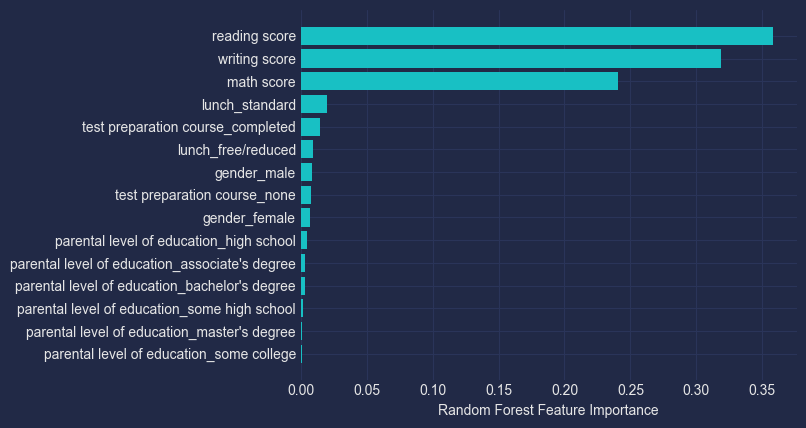

In [23]:
#Se le preguntó a la máquina las variables de importancia
sorted_idx = clf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

# 6.2. Support Vector Machines - SVC

In [24]:
#Se crea el clasificador
clf_2 = svm.SVC(kernel='linear')
#Se utiliza el mismo método para entrenar la máquina
clf_2.fit(x_train, y_train)
#Obtenemos las predicciones
y_pred_2 = clf_2.predict(x_test)
#Solicitamos el reporte
print(classification_report(y_pred=y_pred_2, y_true=y_test))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       173
        True       0.98      1.00      0.99       127

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# 6.3. K-Nearest-Neighbor - KNN

In [25]:
#Se definen los vecinos para clasificar la información
neigh = KNeighborsClassifier(n_neighbors=3)
#Se introduce la información de entrenamiento
neigh.fit(x_train, y_train)
#Se solicita a la máquina que haga las predicciones
y_pred_3 = neigh.predict(x_test)
#Se imprime el reporte de las métricas
print(classification_report(y_pred=y_pred_3, y_true=y_test))


              precision    recall  f1-score   support

       False       0.96      0.95      0.96       173
        True       0.94      0.95      0.95       127

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# 6.4. Regresión Logística

In [26]:
clf_3 = LogisticRegression(random_state=42, max_iter=500, solver='newton-cg').fit(x_train, y_train)
#Se hacen las predicciones
y_pred_4 = clf_3.predict(x_test)
#Se imprime el reporte de las métricas
print(classification_report(y_pred=y_pred_4, y_true=y_test))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       173
        True       0.99      0.98      0.98       127

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# 6.5. Extreme Gradient Boosting - XG Boost

In [27]:
# Convertir etiquetas a 0 y 1
y_train_numeric = y_train.replace({'True': 1, 'False': 0})
y_test_numeric = y_test.replace({'True': 1, 'False': 0})

# Creación de las matrices sparse
dtrain = xgb.DMatrix(x_train, label=y_train_numeric)
dtest = xgb.DMatrix(x_test, label=y_test_numeric)

# Definición de los parámetros
params = {
    'objective': 'binary:logistic',  # Clasificación binaria
    'max_depth': 5,
    'learning_rate': 0.01,
    'n_estimators': 50
}

# Entrenamiento del modelo
model_XGB = xgb.train(params, dtrain, num_boost_round=100)

# Realización de las predicciones
y_preds = model_XGB.predict(dtest)

# Convertir las predicciones a 0 y 1 utilizando un umbral de 0.5
y_pred_5 = np.where(y_preds > 0.5, 1, 0)

# Reporte de clasificación
print(classification_report(y_pred=y_pred_5, y_true=y_test_numeric))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       173
           1       0.98      0.98      0.98       127

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Teniendo en cuenta las métricas que los modelos creados anteriormente nos dieron, el modelo de Machine Learning que mejor nos ayudará para este proyecto va a ser Support Vector Machines o SVC, ya que las métricas de precisión y accuracy están más cerca al 100% que las demás. Por lo que vamos a continuar con este.